#TITANIC PROJECT

In [1]:
# import file ke google colab
from google.colab import files

# upload file
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr. Benja

In [2]:
# import modul yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# baca data yang telah diupload
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# DATA UNDERSTANDING TRAIN

In [4]:
# tampilkan data train 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# ukuran train
train.shape

(891, 12)

In [6]:
# tampilkan nama seluruh kolom dalam train
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# deskripsi tentang train
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# informasi tentang train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Count Plot dari data numerik

In [9]:
# kolom yang bertype data numerik
train_numeric = train.dtypes[train.dtypes != "object"].index
train_numeric

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Catatan :
1. dalam kolom data train terdapat beberapa data numerik yang sebenarnya merupakan data katagorikal, seperti Pclass dan Survived.
2. kolom Survived nantinya akan dijadikan sebagai variabel terikat( target variabel)
3. variabel bebas (features variable) yang kasus ini yang bertype data numerik yaitu : Age, SibSp, Parch dan Fare

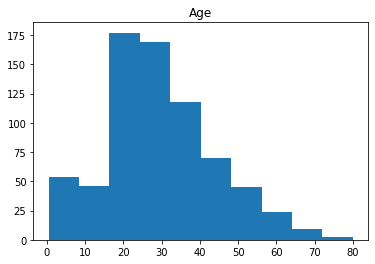

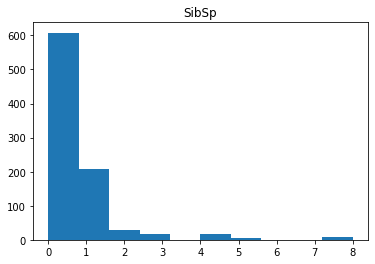

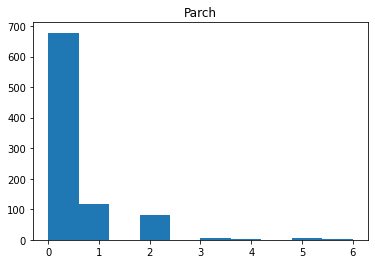

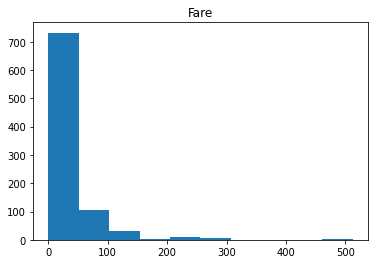

In [10]:
# kolom bertype data numerik
train_numeric = train[['Age', 'SibSp', 'Parch', 'Fare']]

# count plot dari data numerik
for i in train_numeric.columns:
    plt.hist(train_numeric[i])
    plt.title(i)
    plt.show()

### Count Plot data kategorikal

In [11]:
# train bertype data kategorikal
train_categoric = train.dtypes[train.dtypes == "object"].index
train_categoric

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Catatan :
karena terdapat beberapa data numerik yang sebenarnya merupakan data kategorik yang tidak terdapat didalam train_categorik, sehingga data tersebut akan dimasukan kedalam data kategorik

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


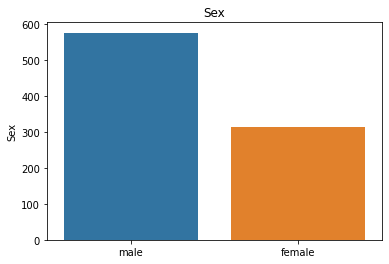

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


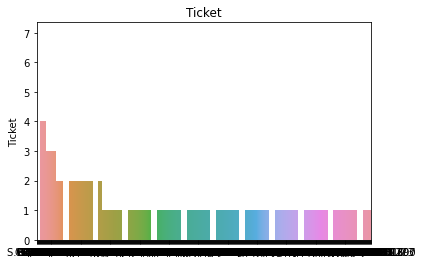

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


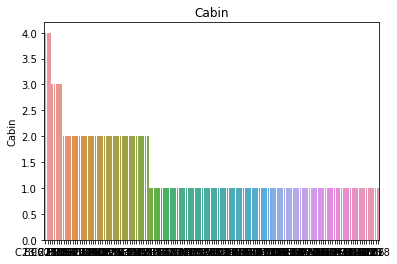

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


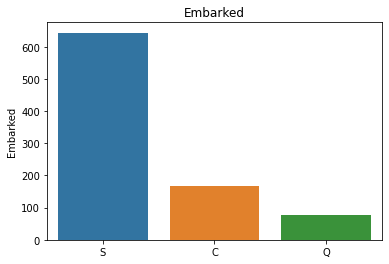

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


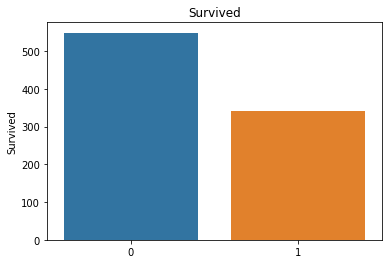

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


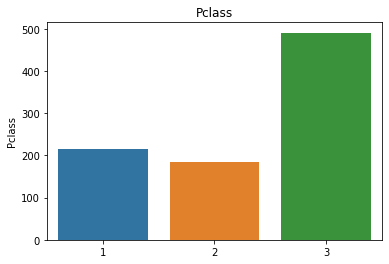

In [12]:
# kolom yang bertype data katerorikal
train_categoric = train[['Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived', 'Pclass']]

# barplot plot dari data kategorik
for i in train_categoric.columns:
    sns.barplot(train_categoric[i].value_counts().index,train_categoric[i].value_counts()).set_title(i)
    plt.show()

####Lihat korelasi antar variabel dalam train

In [13]:
# korelasi antar variabel train numerik
print(train_numeric.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


In [14]:
# korelasi antara variabel dependen Survived dengan variabel inependen yang bertype numerik 'Age', 'SibSp', 'Parch', 'Fare'
corr = (train[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']]).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
corr[corr['Feature 1'] == 'Survived']

,Feature 1,Feature 2,Correlation Coefficient
4,Survived,Survived,1.000000
9,Survived,Fare,0.257307
20,Survived,Parch,0.081629
22,Survived,Age,0.077221
23,Survived,SibSp,0.035322


In [15]:
# korelasi antar variabel train katagorik
print(train_categoric.corr())

          Survived    Pclass
Survived  1.000000 -0.338481
Pclass   -0.338481  1.000000


In [16]:
# korelasi antara variabel dependen Survived dengan variabel inependen yang bertype numerik 'Age', 'SibSp', 'Parch', 'Fare'
corr = (train[['Survived', 'Pclass']]).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
corr[corr['Feature 1'] == 'Survived']

,Feature 1,Feature 2,Correlation Coefficient
1,Survived,Survived,1.000000
3,Survived,Pclass,0.338481


#### Bandingkan nilai variabel dependen Survived dengan variabel independen numerikal dan kategorikal

In [17]:
# pivot tabel Survidev dengan train_numeric
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [18]:
# pivot tabel Survidev dengan train_kategiric
pd.pivot_table(train, index = 'Survived', values = ['Pclass'])

,Pclass
Survived,
0,2.531876
1,1.950292


Catatan :
karena 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived', bukan merupakan data angka sehingga nilai korelasi dan tabel pivotnya tidak dapat dimuat dengan menggunakan data berikut.

In [19]:
# pivot tabel Survived dengan beberapa variabel kategorik
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


# DATA UNDERSTANDING TEST

In [20]:
# menampilkan data test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
# ukuran test
test.shape

(418, 11)

In [22]:
# nama kolom yang terdapat dalam test
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
# deskripsi tentang test
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
# info tentang test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [25]:
# kolom yang bertype data numerik
test_numeric = test.dtypes[test.dtypes != "object"].index
test_numeric

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

catatan :
di dalam data test terdapat data numerik yang sebenarnya merupakan data bertype katagorikal, sehingga data tersebut harus dimasukan kedalam data bertye katagorik yaitu Pclass

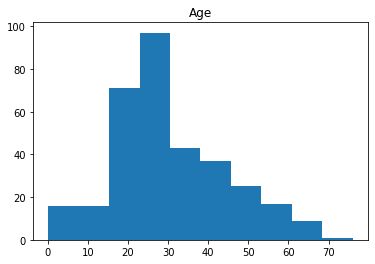

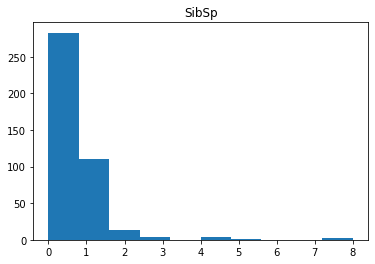

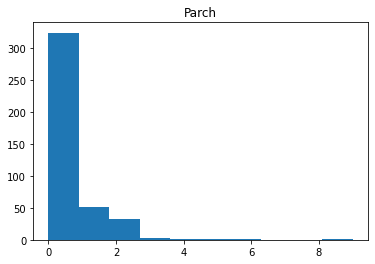

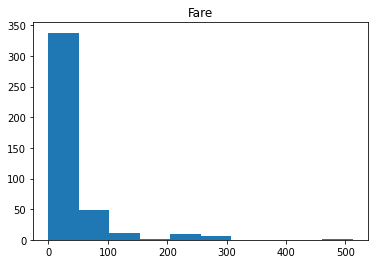

In [26]:
# kolom bertype data numerik
test_numeric = test[['Age', 'SibSp', 'Parch', 'Fare']]

# count plot dari data numerik
for i in test_numeric.columns:
    plt.hist(test_numeric[i])
    plt.title(i)
    plt.show()

In [27]:
# test yang bertipe data kategorik
test_categoric = test.dtypes[test.dtypes == "object"].index
test_categoric

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


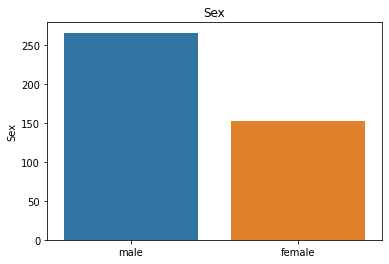

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


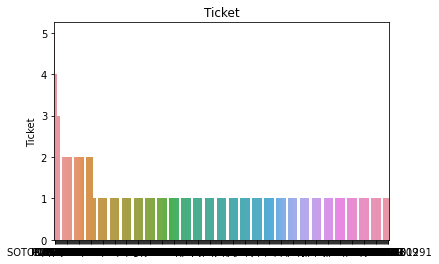

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


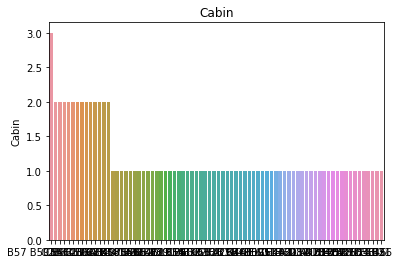

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


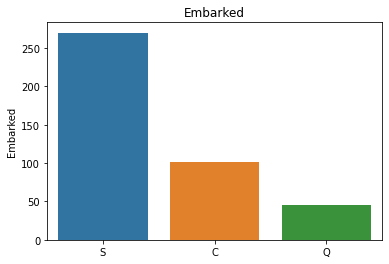

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


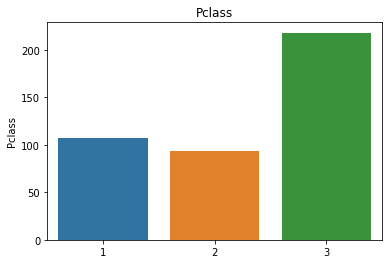

In [28]:
# kolom yang bertype data katerorikal
test_categoric = test[['Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass']]

# barplot plot dari data kategorik
for i in test_categoric.columns:
    sns.barplot(test_categoric[i].value_counts().index,test_categoric[i].value_counts()).set_title(i)
    plt.show()

In [29]:
# korelasi antar variabel test numerik
print(test_numeric.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.091587 -0.061249  0.337932
SibSp -0.091587  1.000000  0.306895  0.171539
Parch -0.061249  0.306895  1.000000  0.230046
Fare   0.337932  0.171539  0.230046  1.000000


# HANDLING MISSING VALUE

In [30]:
# banyak baris train dan test
ntrain = train.shape[0]
ntest = test.shape[0]

# buat data baru
train_PassengerId = train["PassengerId"]
test_PassengerId = test["PassengerId"]
train_survived = train["Survived"]
y_train = train.Survived.values

# gabungkan train dan test
all_data = pd.concat((train, test)).reset_index(drop=True)

# hapus kolom Survived 
all_data.drop(['Survived', 'PassengerId'], axis=1, inplace=True)
all_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# cek ukuran data gabungan
all_data.shape

(1309, 10)

In [32]:
# descripsi tentang data gabungan
all_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [33]:
# info tentang data gabungan
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.4+ KB


In [34]:
# feature numerik
data_categoric = all_data.dtypes[all_data.dtypes == "object"].index
data_categoric

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [35]:
# feature yang memiliki missing value
all_data.isnull().sum()[all_data.isnull().sum()>0]

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

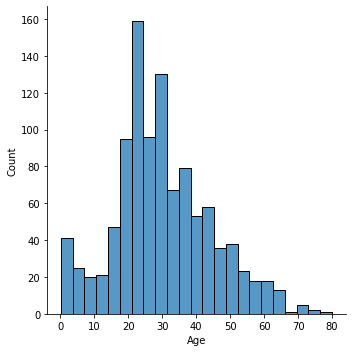

In [36]:
# plot Age
sns.displot(all_data["Age"])

In [37]:
# isi missing value Age
all_data["Age"] = all_data["Age"].fillna(all_data["Age"].median())

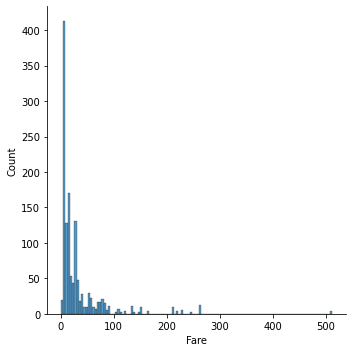

In [38]:
# plot Fare
sns.displot(all_data['Fare'])

In [39]:
# isi missing value Fare
all_data["Fare"] = all_data["Fare"].fillna(all_data["Fare"].median())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


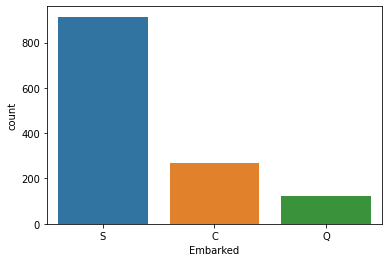

In [40]:
# plot Embarked
sns.countplot(all_data['Embarked'])

In [41]:
# isi missing value Embarked
all_data['Embarked'] = all_data['Embarked'].fillna(all_data['Embarked'].mode()[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


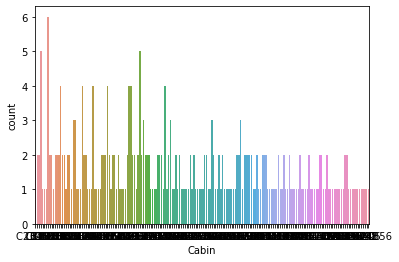

In [42]:
# plot Cabin
sns.countplot(all_data['Cabin'])

In [43]:
# isi missing value Cabin
all_data['Cabin'] = all_data['Cabin'].fillna(all_data['Cabin'].mode()[0])

In [44]:
# Recek missing value
all_data.isnull().sum()[all_data.isnull().sum()>0]

Series([], dtype: int64)

#### Feature angineering data gabungan

In [45]:
# buat feature baru cabin_aphabet
all_data['cabin_alphabet'] = all_data.Cabin.apply(lambda x: str(x)[0])
print(all_data.cabin_alphabet.value_counts())

C    1108
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_alphabet, dtype: int64


In [46]:
# buat feature baru cabin_multiple 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_multiple'].value_counts()

3    1024
1     254
2      26
4       5
Name: cabin_multiple, dtype: int64

In [47]:
# buat featur baru tiket ticket_numerik
all_data['ticket_numeric'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_numeric'].value_counts()

1    957
0    352
Name: ticket_numeric, dtype: int64

### Convert Kategorikal feature

In [48]:
# convert Sex
all_data['Sex'] = all_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [49]:
# conver Embarked
all_data['Embarked'] = all_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [50]:
# convert cabin_aplphabet
all_data['cabin_alphabet'] = all_data['cabin_alphabet'].map( {'A':1, 'B': 2, 'C':3, 'D':4, 'E': 5, 'F':6, 'G':7, 'T':8 } ).astype(int)

In [51]:
# recek 
all_data.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_alphabet,cabin_multiple,ticket_numeric
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,0,3,3,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3,1,0
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,0,3,3,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3,1,1
4,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,C23 C25 C27,0,3,3,1


In [52]:
# hapus feature 'Name', 'Ticket', 'Cabin', 'family'
all_data = all_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [53]:
# recek feature yang telah dihapus
all_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_alphabet,cabin_multiple,ticket_numeric
0,3,0,22.0,1,0,7.2500,0,3,3,0
1,1,1,38.0,1,0,71.2833,1,3,1,0
2,3,1,26.0,0,0,7.9250,0,3,3,0


### Split Data

In [54]:
# membagi all_data menjadi data train dan test
x_train = all_data[:ntrain]
x_test = all_data[ntrain:]
print(len(train))
print(len(test))

891
418


In [55]:
# cek ukuran x train
x_train.shape

(891, 10)

In [56]:
# cek ukuran x test
x_test.shape

(418, 10)

#MODELING

In [65]:
# import modul yang dibutuhkan  
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

Terlebihdahulu lihat kinerja beberapa model berdasarkan parameter default. lihat kinerja model tersebut dengan menggunakan 5 cross validation (cv=5) untuk memperoleh baselinenya.

#### CROSS VALIDATION

In [61]:
# metode Neive bayes (GaussNB)
gauss = GaussianNB()
cv = cross_val_score(gauss, x_train, y_train, cv=5)
print(cv)
print('rata-rata nilai cross validation metode Neive Bayyes : ',cv.mean())


[0.72625698 0.74719101 0.79775281 0.7752809  0.82022472]
rata-rata nilai cross validation metode Neive Bayyes :  0.7733412842884941


In [63]:
# metode Regresi Logistik
logistic_reg =  LogisticRegression(max_iter = 2000)
cv = cross_val_score(logistic_reg, x_train, y_train, cv=5)
print(cv)
print('rata-rata nilai cross validation metode Regresi Logistik : ',cv.mean())

[0.81564246 0.78651685 0.78651685 0.7752809  0.82022472]
rata-rata nilai cross validation metode Regresi Logistik :  0.7968363567886511


In [66]:
# metode Decision Tree
tree = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(tree, x_train, y_train, cv=5)
print(cv)
print('rata-rata nilai cross validation metode Decision Tree : ',cv.mean())

[0.73743017 0.78651685 0.83146067 0.75842697 0.81460674]
rata-rata nilai cross validation metode Decision Tree :  0.7856882807105643


In [67]:
# metode KNeigbors
knn =  KNeighborsClassifier()
cv = cross_val_score(knn, x_train, y_train, cv=5)
print(cv)
print('rata-rata nilai cross validation metode Kneigbors : ',cv.mean())

[0.63687151 0.63483146 0.71348315 0.70786517 0.74157303]
rata-rata nilai cross validation metode Kneigbors :  0.6869248634737304


In [68]:
# metode Random Forest
forest =  RandomForestClassifier(random_state = 1)
cv = cross_val_score(forest, x_train, y_train, cv=5)
print(cv)
print('rata-rata nilai cross validation metode Random Forest : ',cv.mean())

[0.77653631 0.78651685 0.85955056 0.75280899 0.83707865]
rata-rata nilai cross validation metode Random Forest :  0.8024982738057874


In [69]:
# metode SVC
scv =  SVC(probability = True)
cv = cross_val_score(scv, x_train, y_train, cv=5)
print(cv)
print('rata-rata nilai cross validation metode SCV : ',cv.mean())

[0.59217877 0.71348315 0.69101124 0.68539326 0.69101124]
rata-rata nilai cross validation metode SCV :  0.674615529470843


In [70]:
# metode XGBoost
xgb =  XGBClassifier(random_state =1)
cv = cross_val_score(xgb, x_train, y_train, cv=5)
print(cv)
print('rata-rata nilai cross validation metode XGBoost : ',cv.mean())

[0.80446927 0.82022472 0.84831461 0.78651685 0.86516854]
rata-rata nilai cross validation metode XGBoost :  0.8249387985688281


In [71]:
from sklearn.ensemble import VotingClassifier
# melakukan voting untuk mendapatkan vote populet dari berbagai metode
avg_voting = VotingClassifier(estimators = [('gauss', gauss),('logistic_reg', logistic_reg),
                                            ('knn', knn),('forest', forest),
                                            ('scv', scv), ('xgb', xgb)], voting = 'soft')

# Rata-rata score cross validation tiap metode
cv = cross_val_score(avg_voting, x_train, y_train, cv=5)
print(cv)
print('rata-rata nilai cross validation menggunakan voting : ',cv.mean())

[0.75977654 0.7752809  0.83707865 0.78651685 0.83707865]
rata-rata nilai cross validation menggunakan voting :  0.7991463184985249


In [72]:
# import modul yang diperlukan
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

### Tone model untuk meningkatkan perfoma model 

In [73]:
# fungsi peningkatan model
def clf_performance(classifier, model_name):
    print(model_name)
    print("__________________________________________________________________________________")
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))
    print("__________________________________________________________________________________")

In [74]:
# Tone model Regresi Logistic
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(x_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Logistic Regression
__________________________________________________________________________________
Best Score: 0.8024606113866047
Best Parameters: {'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
__________________________________________________________________________________


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


In [75]:
# Tone model Kneihbors
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(x_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KNN
__________________________________________________________________________________
Best Score: 0.7441529094218818
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
__________________________________________________________________________________


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.8s finished


### Model fix

In [78]:
# pilih model regresi logistik
best_clf_lr.fit(x_train, y_train)
y_hat_lr = best_clf_lr.predict(x_test).astype(int)

# buat dataframe baru submission
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_lr}
submission = pd.DataFrame(data=final_data)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


In [79]:
# simpan submission
submission.to_csv('submission_lr.csv', index =False)
submission




,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
